# EDA : Netflix Dataset

### Import libraries and read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'C:\Users\HP\Downloads\Netflix Dataset.csv')

df.head(5)      # to display top 5 records
# df.tail(5)    # to display last 5 records

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Anomaly Detection

### Check for duplicates

In [2]:
# Below function will retrieve all duplicate records available in dataframe.

df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


### Drop the dupllicates

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
# To verify we can run the duplicated() to confirm if there are still duplicates in dataframe.

df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


### Check for missing values & plot Heatmap

Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Show_Id            0
Category           0
Title              0
Duration           0
Type               0
Description        0
dtype: int64


<AxesSubplot:>

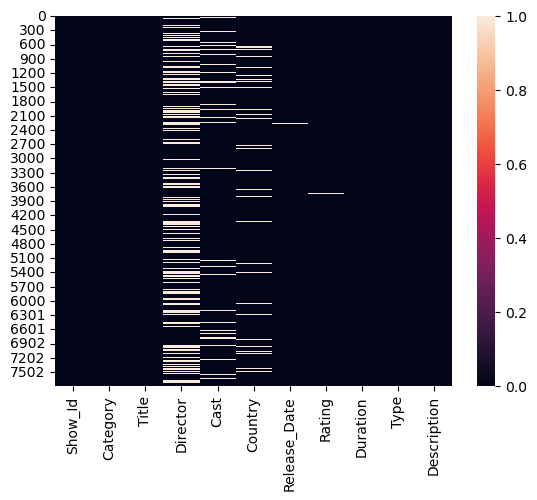

In [5]:
# We can use isnull().sum() to get the missing values

print(df.isnull().sum().sort_values(ascending=False))

# How to sort by multiple columns 
#df_sorted = df.sort_values(by=['col_1', 'col_2'], ascending=[True, False])

# To drop the NA values we can use dropna() function.
# df = df.dropna()

# Heatmap
sns.heatmap(df.isnull())

## Some Questions & Answers

### 1. For 'House of Cards', what is the Show ID and who is the Director of this Show ?

For this Question we need to filter out based on Title = 'House of Cards'

In [6]:
df[df['Title'] == 'House of Cards']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


Now we only want Show ID and Director so for that we will just add the column names we want as Output

In [7]:
df[df['Title'] == 'House of Cards'][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


Some other ways to get the same output using str.contains() and str.isin() 

In [8]:
df[df['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [9]:
df[df['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


### 2. In which year Highest number of TV Shows & Movies were released ? Show Bar Graph

Lets first check the Data Types of each columns. If its not Date then we need to Typecast it.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


In [11]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

<AxesSubplot:xlabel='Year', ylabel='Movies & TV Shows'>

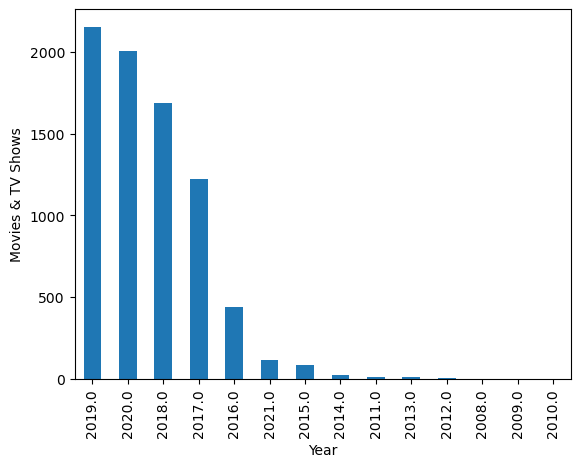

In [12]:
# Here we can see Year 2019 Tops the higest number of TV Shows and Movie Releases.

plt.xlabel('Year')
plt.ylabel('Movies & TV Shows')

df['Release_Date'].dt.year.value_counts().plot(kind='bar')

### 3. How Many Movies and TV Shows are in the Dataset? Plot Graph

We can use the same function sort_values() to get this answer.

In [13]:
df['Category'].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

Alternate way is to use groupby()

In [14]:
df.groupby('Category')['Category'].count()

############## OR #############

# df.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Count'>

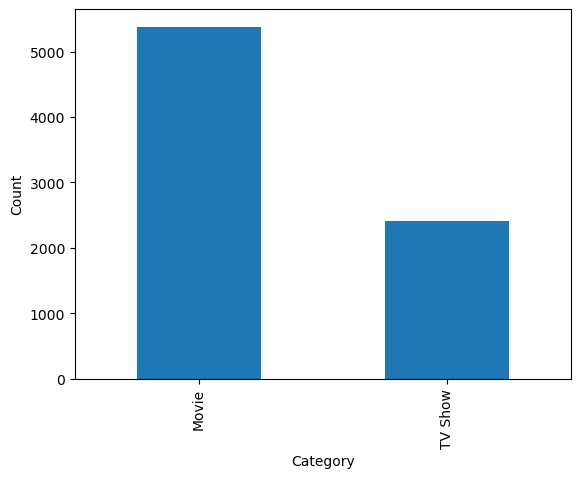

In [15]:
plt.xlabel('Category')
plt.ylabel('Count')

df['Category'].value_counts().plot(kind='bar')

# Also we can plot like this

# sns.countplot(df['Category'])

### 4. How many TV shows got R rating after 2018 ?

In [16]:
df[(df['Category'] == 'TV Show') & (df['Rating'] == 'R') & (df['Release_Date'].dt.year > 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...


### 5. How many Movies got 'TV-14' rating in Canada ?

In [17]:
df[(df['Category'] == 'Movie') & (df['Rating'] == 'TV-14') & (df['Country'] == 'Canada')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,2020-02-05,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,2018-12-27,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,2018-07-01,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,2017-11-12,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,2019-10-14,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,2017-08-22,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,2017-12-01,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,NaN,Canada,2019-07-01,TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands..."
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,2019-06-18,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...


### 6. What are the different ratings defined by Netflix ?

In [18]:
df['Rating'].unique()         

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

Here we are able to see the NaN value so to remove it We can drop the NULL values from 'Rating'

In [19]:
df['Rating'].dropna().unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

### 7. In how many Movies/TV Shows Tom Cruise was Cast ?

After analyzing the cast column we can see that its data type is object and there are a lot of NULL values available.
So we need to typecast the column and we can replace NULL will 'UNKNOWN' for accurate results.

In [20]:
df['Cast'].astype('str')
type(df['Cast'][0])

str

In [21]:
df['Cast'].fillna('Unknown',inplace=True)

df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast               0
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [22]:
# For Tom Cruise

df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


### 8. Show TOP 10 Directors who gave highest number of TV Shows and Movies to Netflix ?

<AxesSubplot:>

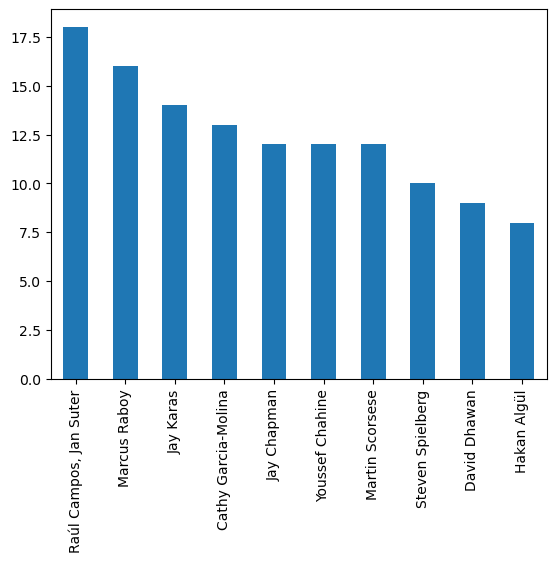

In [23]:
df['Director'].value_counts().head(10).plot(kind='bar')

### 9. Show all records where Category is Movie and Type is Comedies or Country is United Kingdom

In [24]:
df['Type'].astype('str')

type(df['Type'][0])

str

In [25]:
df[ ((df['Category'] == 'Movie') & (df['Type'].isin(['Comedies'])) ) | (df['Country'] == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,Unknown,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


### 10. Show only the Title of TV Shows that were released in India Only

In [26]:
df[(df['Category'] == 'TV Show') & (df['Country'] == 'India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

Alternate way to Solve this

In [27]:
df.query("Category == 'TV Show' and Country == 'India'")[['Title']]

,Title
86,21 Sarfarosh: Saragarhi 1897
132,7 (Seven)
340,Agent Raghav
364,Akbar Birbal
533,Anjaan: Rural Myths
...,...
6249,The Creative Indians
6400,The Golden Years with Javed Akhtar
6469,The House That Made Me
7294,Typewriter


## This concludes the EDA on Netflix Dataset

## Thank you!